<a href="https://colab.research.google.com/github/Abhis3510/AgriBuzz-Pro---New-Design/blob/main/Hybrid_ESMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import os

# Create folder
os.makedirs("dataset/raw", exist_ok=True)

# Companies list
companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

# Download data
for company in companies:

    print("Downloading", company)

    df = yf.download(company, start="2005-01-01", end=None)

    df.to_csv(f"dataset/raw/{company}.csv")

print("All datasets downloaded successfully!")


/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735573424.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(company, start="2005-01-01", end=None)


[*********************100%***********************]  1 of 1 completed

All datasets downloaded successfully!


In [3]:
import os

print(os.listdir("dataset/raw"))


['GOOGL.csv', 'AMZN.csv', 'TSLA.csv', 'MSFT.csv', 'NVDA.csv', 'AAPL.csv']


In [4]:
import pandas as pd

df = pd.read_csv("dataset/raw/AAPL.csv")

print(df.head())
print("Total rows:", len(df))


        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2005-01-03  0.9481798410415649  0.9754461038478958  0.9378420660617339   
3  2005-01-04   0.957917332649231  0.9808386521825168  0.9433848450194857   
4  2005-01-05  0.9663072228431702  0.9775435080115766  0.9595652917223998   

                 Open      Volume  
0                AAPL        AAPL  
1                 NaN         NaN  
2  0.9705020940926308   691992000  
3  0.9556697561766366  1096810400  
4  0.9657073488928893   680433600  
Total rows: 5315


In [6]:
import pandas as pd

df = pd.read_csv("dataset/raw/AAPL.csv")

print(df.head())
print("\nColumns:", df.columns)


        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2005-01-03  0.9481798410415649  0.9754461038478958  0.9378420660617339   
3  2005-01-04   0.957917332649231  0.9808386521825168  0.9433848450194857   
4  2005-01-05  0.9663072228431702  0.9775435080115766  0.9595652917223998   

                 Open      Volume  
0                AAPL        AAPL  
1                 NaN         NaN  
2  0.9705020940926308   691992000  
3  0.9556697561766366  1096810400  
4  0.9657073488928893   680433600  

Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [8]:
import pandas as pd
import os

os.makedirs("dataset/processed", exist_ok=True)

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

# Indicator function
def generate_indicators(df):

    delta = df['Close'].diff()

    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()

    rs = avg_gain / avg_loss

    df['RSI'] = 100 - (100 / (1 + rs))

    df['EMA'] = df['Close'].ewm(span=20).mean()

    ema12 = df['Close'].ewm(span=12).mean()
    ema26 = df['Close'].ewm(span=26).mean()

    df['MACD'] = ema12 - ema26

    return df


for company in companies:

    print("Processing", company)

    df = pd.read_csv(f"dataset/raw/{company}.csv")

    # Fix Date column name
    if df.columns[0] != "Date":
        df.rename(columns={df.columns[0]: "Date"}, inplace=True)

    # Convert Date column
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove invalid rows
    df = df.dropna(subset=['Date'])

    # Convert financial columns to numeric
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with invalid numbers
    df = df.dropna()

    # Sort by Date
    df = df.sort_values("Date")

    # Generate indicators
    df = generate_indicators(df)

    # Add company column
    df['Company'] = company

    # Final cleanup
    df = df.dropna()

    # Save processed file
    df.to_csv(f"dataset/processed/{company}_processed.csv", index=False)

    print("Saved:", f"dataset/processed/{company}_processed.csv")

print("\nSTEP 2 COMPLETED SUCCESSFULLY")


Processing AAPL
Saved: dataset/processed/AAPL_processed.csv
Processing MSFT


/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Saved: dataset/processed/MSFT_processed.csv
Processing TSLA
Saved: dataset/processed/TSLA_processed.csv
Processing GOOGL
Saved: dataset/processed/GOOGL_processed.csv
Processing AMZN


/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Saved: dataset/processed/AMZN_processed.csv
Processing NVDA
Saved: dataset/processed/NVDA_processed.csv

STEP 2 COMPLETED SUCCESSFULLY


/tmp/ipython-input-1495127989.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [9]:
import pandas as pd

df = pd.read_csv("dataset/processed/AAPL_processed.csv")

print(df.head())
print(df.dtypes)


         Date     Close      High       Low      Open     Volume        RSI  \
0  2005-01-24  1.060091  1.075373  1.056945  1.063387  841629600  70.309732   
1  2005-01-25  1.079417  1.091252  1.062788  1.069230  969231200  71.308275   
2  2005-01-26  1.082414  1.089904  1.066983  1.088556  739496800  70.755051   
3  2005-01-27  1.088256  1.092451  1.071927  1.081065  496227200  71.278047   
4  2005-01-28  1.108331  1.108331  1.085260  1.087957  801612000  65.111630   

        EMA      MACD Company  
0  1.029931  0.010868    AAPL  
1  1.035834  0.012260    AAPL  
2  1.041260  0.013356    AAPL  
3  1.046621  0.014399    AAPL  
4  1.053530  0.016313    AAPL  
Date        object
Close      float64
High       float64
Low        float64
Open       float64
Volume       int64
RSI        float64
EMA        float64
MACD       float64
Company     object
dtype: object


In [10]:
!pip install yfinance


In [11]:
import pandas as pd
import yfinance as yf
import numpy as np
import os

INPUT_FOLDER = "dataset/processed"
OUTPUT_FILE = "dataset/FINAL_GLOBAL_HYBRID_DATASET.csv"

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

print("Downloading VIX data...")
vix = yf.download("^VIX", start="2005-01-01")
vix.reset_index(inplace=True)

# Fix column names
vix.columns = [col[0] if isinstance(col, tuple) else col for col in vix.columns]

vix = vix[['Date', 'Close']]
vix.rename(columns={'Close': 'VIX_Close'}, inplace=True)

print("Downloading S&P500 data...")
sp500 = yf.download("^GSPC", start="2005-01-01")
sp500.reset_index(inplace=True)

sp500.columns = [col[0] if isinstance(col, tuple) else col for col in sp500.columns]

sp500 = sp500[['Date', 'Close']]
sp500.rename(columns={'Close': 'SP500_Close'}, inplace=True)

# Sentiment generator
def generate_sentiment(df):

    sentiment = [0]

    for i in range(1, len(df)):

        change = df['Close'].iloc[i] - df['Close'].iloc[i-1]

        score = np.tanh(change / df['Close'].iloc[i])

        sentiment.append(score)

    df['Sentiment'] = sentiment

    return df


all_data = []

for company in companies:

    print("Processing", company)

    df = pd.read_csv(f"{INPUT_FOLDER}/{company}_processed.csv")

    df['Date'] = pd.to_datetime(df['Date'])

    # Merge VIX
    df = df.merge(vix, on="Date", how="left")

    # Merge SP500
    df = df.merge(sp500, on="Date", how="left")

    # Add sentiment
    df = generate_sentiment(df)

    df.dropna(inplace=True)

    all_data.append(df)


# Combine all companies
final_df = pd.concat(all_data)

# Sort final dataset
final_df = final_df.sort_values(["Company", "Date"])

# Save
final_df.to_csv(OUTPUT_FILE, index=False)

print("\nSUCCESS: FINAL_GLOBAL_HYBRID_DATASET.csv created")

print("\nDataset Shape:", final_df.shape)

print("\nColumns:")
print(final_df.columns.tolist())


/tmp/ipython-input-2417783054.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2005-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2417783054.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2005-01-01")


[*********************100%***********************]  1 of 1 completed


Processing AAPL
Processing MSFT
Processing TSLA
Processing GOOGL
Processing AMZN
Processing NVDA

SUCCESS: FINAL_GLOBAL_HYBRID_DATASET.csv created

Dataset Shape: (30413, 13)

Columns:
['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMA', 'MACD', 'Company', 'VIX_Close', 'SP500_Close', 'Sentiment']


In [12]:
df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

print(df.head())

print("\nTotal rows:", len(df))

print("\nColumns:", df.columns)


         Date     Close      High       Low      Open     Volume        RSI  \
0  2005-01-24  1.060091  1.075373  1.056945  1.063387  841629600  70.309732   
1  2005-01-25  1.079417  1.091252  1.062788  1.069230  969231200  71.308275   
2  2005-01-26  1.082414  1.089904  1.066983  1.088556  739496800  70.755051   
3  2005-01-27  1.088256  1.092451  1.071927  1.081065  496227200  71.278047   
4  2005-01-28  1.108331  1.108331  1.085260  1.087957  801612000  65.111630   

        EMA      MACD Company  VIX_Close  SP500_Close  Sentiment  
0  1.029931  0.010868    AAPL      14.65  1163.750000   0.000000  
1  1.035834  0.012260    AAPL      14.06  1168.410034   0.017902  
2  1.041260  0.013356    AAPL      13.44  1174.069946   0.002769  
3  1.046621  0.014399    AAPL      13.24  1174.550049   0.005369  
4  1.053530  0.016313    AAPL      13.24  1171.359985   0.018111  

Total rows: 30413

Columns: Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMA', 'MACD',
       'Company

In [13]:
!pip install tensorflow scikit-learn matplotlib


Loading dataset...
Training samples: 4191
Testing samples: 1048

Training LSTM...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 6.2256e-05 - val_loss: 0.0014
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 3.0101e-05 - val_loss: 6.1336e-04
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 2.2450e-05 - val_loss: 0.0013
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 1.4773e-05 - val_loss: 0.0011
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.4518e-05 - val_loss: 9.7404e-04
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 1.2955e-05 - val_loss: 8.3964e-04
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 1.6583e-05 - val_loss: 3.8357e-04
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 1.8344e-05 - val_loss: 0.0014
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 1.2579e-05 - val_loss: 0.0012
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.0425e-05 - val_loss:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051 - val_loss: 0.0178
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4542e-05 - val_loss: 0.0144
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7808e-05 - val_loss: 0.0121
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2050e-05 - val_loss: 0.0109
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8281e-05 - val_loss: 0.0116
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4949e-05 - val_loss: 0.0108
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1636e-05 - val_loss: 0.0103
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4031e-05 - val_loss: 0.0128
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3748e-05 - val_loss: 0.0118
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0062e-05 - val_loss: 0.0099
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1625e-05 - val_loss: 0.0098
Epoch 12/20
118/118 ━━

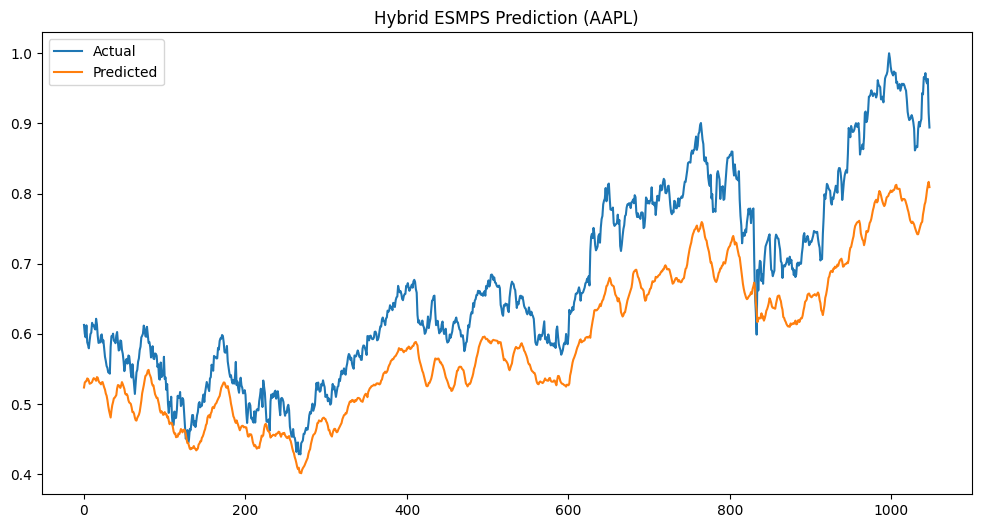

In [14]:
# =========================
# STEP 4: Hybrid ESMPS Training
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


# =========================
# Load dataset
# =========================

print("Loading dataset...")

df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

# Select one company for training (example: AAPL)
df = df[df['Company'] == "AAPL"]

df = df.sort_values("Date")


# =========================
# Select features
# =========================

features = [
    'Close',
    'RSI',
    'EMA',
    'MACD',
    'VIX_Close',
    'SP500_Close',
    'Sentiment'
]

data = df[features].values


# =========================
# Normalize data
# =========================

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)


# =========================
# Create sequences
# =========================

LOOKBACK = 60

X = []
y = []

for i in range(LOOKBACK, len(data_scaled)):

    X.append(data_scaled[i-LOOKBACK:i])

    y.append(data_scaled[i, 0])

X = np.array(X)
y = np.array(y)


# =========================
# Train test split
# =========================

split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


# =========================
# LSTM Model
# =========================

print("\nTraining LSTM...")

lstm_model = Sequential()

lstm_model.add(LSTM(64, return_sequences=True,
                    input_shape=(LOOKBACK, X.shape[2])))

lstm_model.add(LSTM(32))

lstm_model.add(Dense(1))

lstm_model.compile(loss='mse', optimizer='adam')

lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)]
)


# =========================
# GRU Model
# =========================

print("\nTraining GRU...")

gru_model = Sequential()

gru_model.add(GRU(64, return_sequences=True,
                  input_shape=(LOOKBACK, X.shape[2])))

gru_model.add(GRU(32))

gru_model.add(Dense(1))

gru_model.compile(loss='mse', optimizer='adam')

gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)]
)


# =========================
# CNN Model
# =========================

print("\nTraining CNN...")

cnn_model = Sequential()

cnn_model.add(Conv1D(
    filters=64,
    kernel_size=3,
    activation='relu',
    input_shape=(LOOKBACK, X.shape[2])
))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(50, activation='relu'))

cnn_model.add(Dense(1))

cnn_model.compile(loss='mse', optimizer='adam')

cnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)]
)


# =========================
# Predictions
# =========================

print("\nMaking predictions...")

lstm_pred = lstm_model.predict(X_test)

gru_pred = gru_model.predict(X_test)

cnn_pred = cnn_model.predict(X_test)


# Ensemble prediction
ensemble_pred = (lstm_pred + gru_pred + cnn_pred) / 3


# =========================
# Evaluation
# =========================

rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

mae = mean_absolute_error(y_test, ensemble_pred)

print("\nModel Performance:")

print("RMSE:", rmse)

print("MAE:", mae)


# =========================
# Plot results
# =========================

plt.figure(figsize=(12,6))

plt.plot(y_test, label="Actual")

plt.plot(ensemble_pred, label="Predicted")

plt.title("Hybrid ESMPS Prediction (AAPL)")

plt.legend()

plt.show()


In [15]:
# ==========================================
# Hybrid ESMPS Training for ALL Companies
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


# Create folders
os.makedirs("models", exist_ok=True)
os.makedirs("results", exist_ok=True)

# Load dataset
df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

LOOKBACK = 60

results_summary = []

for company in companies:

    print(f"\n========== Training {company} ==========")

    data_company = df[df['Company'] == company].sort_values("Date")

    features = [
        'Close',
        'RSI',
        'EMA',
        'MACD',
        'VIX_Close',
        'SP500_Close',
        'Sentiment'
    ]

    data = data_company[features].values

    scaler = MinMaxScaler()

    data_scaled = scaler.fit_transform(data)

    X = []
    y = []

    for i in range(LOOKBACK, len(data_scaled)):
        X.append(data_scaled[i-LOOKBACK:i])
        y.append(data_scaled[i, 0])

    X = np.array(X)
    y = np.array(y)

    split = int(0.8 * len(X))

    X_train = X[:split]
    X_test = X[split:]

    y_train = y[:split]
    y_test = y[split:]

    # ================= LSTM =================

    lstm_model = Sequential()

    lstm_model.add(LSTM(64, return_sequences=True,
                        input_shape=(LOOKBACK, X.shape[2])))

    lstm_model.add(LSTM(32))

    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mse', optimizer='adam')

    lstm_model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(patience=3)]
    )

    # ================= GRU =================

    gru_model = Sequential()

    gru_model.add(GRU(64, return_sequences=True,
                      input_shape=(LOOKBACK, X.shape[2])))

    gru_model.add(GRU(32))

    gru_model.add(Dense(1))

    gru_model.compile(loss='mse', optimizer='adam')

    gru_model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(patience=3)]
    )

    # ================= CNN =================

    cnn_model = Sequential()

    cnn_model.add(Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        input_shape=(LOOKBACK, X.shape[2])
    ))

    cnn_model.add(MaxPooling1D(pool_size=2))

    cnn_model.add(Flatten())

    cnn_model.add(Dense(50, activation='relu'))

    cnn_model.add(Dense(1))

    cnn_model.compile(loss='mse', optimizer='adam')

    cnn_model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(patience=3)]
    )

    # ================= Predictions =================

    lstm_pred = lstm_model.predict(X_test, verbose=0)
    gru_pred = gru_model.predict(X_test, verbose=0)
    cnn_pred = cnn_model.predict(X_test, verbose=0)

    ensemble_pred = (lstm_pred + gru_pred + cnn_pred) / 3

    # ================= Evaluation =================

    rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    mae = mean_absolute_error(y_test, ensemble_pred)

    print(f"{company} RMSE:", rmse)
    print(f"{company} MAE:", mae)

    results_summary.append([company, rmse, mae])

    # ================= Save models =================

    lstm_model.save(f"models/{company}_lstm.h5")
    gru_model.save(f"models/{company}_gru.h5")
    cnn_model.save(f"models/{company}_cnn.h5")

    # ================= Save graph =================

    plt.figure(figsize=(10,5))

    plt.plot(y_test, label="Actual")
    plt.plot(ensemble_pred, label="Predicted")

    plt.title(f"Hybrid Prediction - {company}")

    plt.legend()

    plt.savefig(f"results/{company}_prediction.png")

    plt.close()


# ================= Summary =================

results_df = pd.DataFrame(
    results_summary,
    columns=["Company", "RMSE", "MAE"]
)

print("\n========== FINAL RESULTS ==========")
print(results_df)

results_df.to_csv("results/model_performance_summary.csv", index=False)



========== Training AAPL ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AAPL RMSE: 0.03536893793077015
AAPL MAE: 0.029609377068284447

========== Training MSFT ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSFT RMSE: 0.022541479866985518
MSFT MAE: 0.017248958328170538

========== Training TSLA ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TSLA RMSE: 0.028930538001833542
TSLA MAE: 0.02131441305227717

========== Training GOOGL ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


GOOGL RMSE: 0.02950132820199587
GOOGL MAE: 0.019504819948255273

========== Training AMZN ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AMZN RMSE: 0.0258322810061901
AMZN MAE: 0.0190427898760372

========== Training NVDA ==========


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NVDA RMSE: 0.13556347403945498
NVDA MAE: 0.09449374575810146

========== FINAL RESULTS ==========
  Company      RMSE       MAE
0    AAPL  0.035369  0.029609
1    MSFT  0.022541  0.017249
2    TSLA  0.028931  0.021314
3   GOOGL  0.029501  0.019505
4    AMZN  0.025832  0.019043
5    NVDA  0.135563  0.094494



Processing AAPL


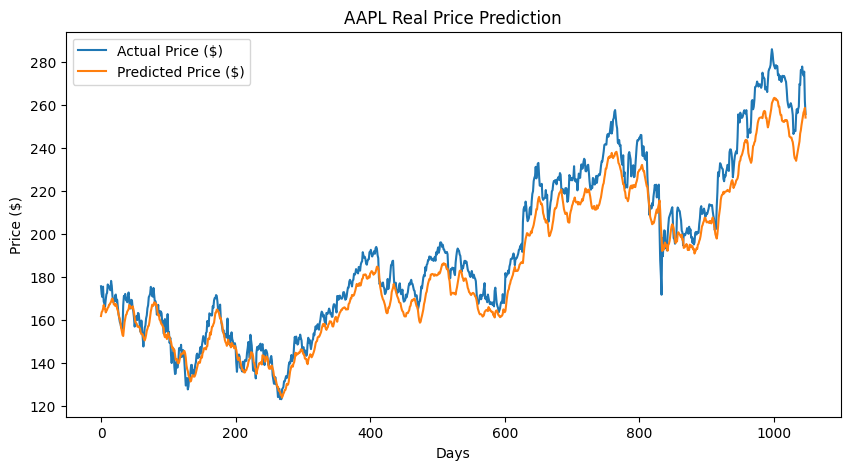


Processing MSFT


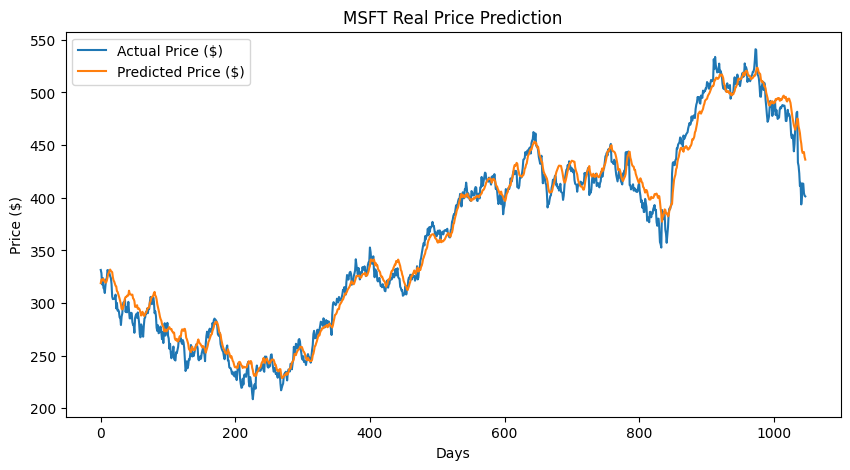


Processing TSLA


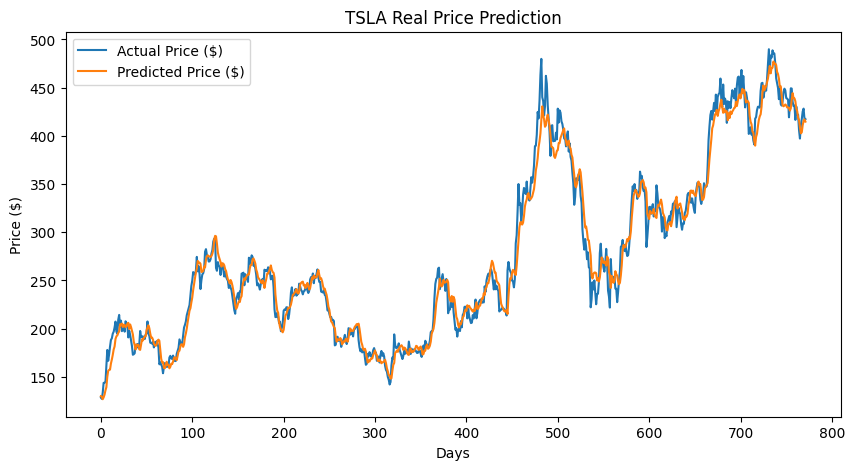


Processing GOOGL


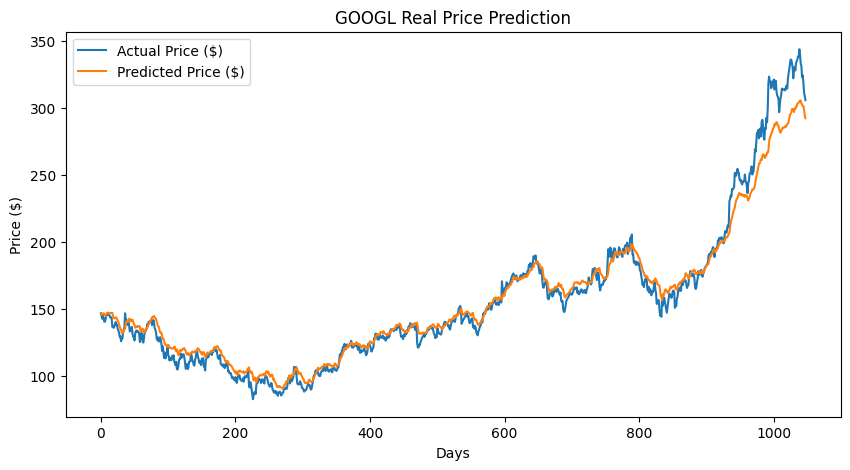


Processing AMZN


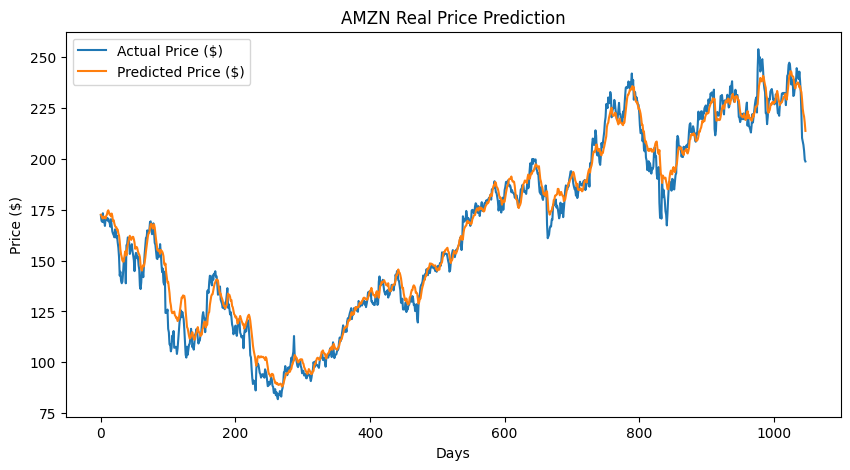


Processing NVDA


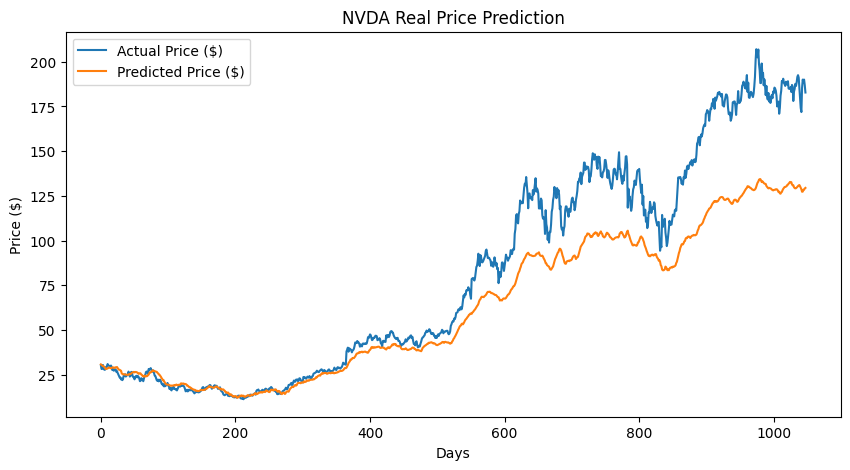


Conversion complete.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import os

df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

LOOKBACK = 60

os.makedirs("real_price_results", exist_ok=True)

for company in companies:

    print(f"\nProcessing {company}")

    data_company = df[df['Company'] == company].sort_values("Date")

    features = [
        'Close',
        'RSI',
        'EMA',
        'MACD',
        'VIX_Close',
        'SP500_Close',
        'Sentiment'
    ]

    data = data_company[features].values

    scaler = MinMaxScaler()

    data_scaled = scaler.fit_transform(data)

    X = []
    y = []

    for i in range(LOOKBACK, len(data_scaled)):
        X.append(data_scaled[i-LOOKBACK:i])
        y.append(data_scaled[i, 0])

    X = np.array(X)
    y = np.array(y)

    split = int(0.8 * len(X))

    X_test = X[split:]
    y_test = y[split:]

    # Load models
    # FIX: Add safe_mode=False and compile=False to load models saved in legacy .h5 format
    lstm_model = load_model(f"models/{company}_lstm.h5", safe_mode=False, compile=False)
    gru_model = load_model(f"models/{company}_gru.h5", safe_mode=False, compile=False)
    cnn_model = load_model(f"models/{company}_cnn.h5", safe_mode=False, compile=False)

    lstm_pred = lstm_model.predict(X_test, verbose=0)
    gru_pred = gru_model.predict(X_test, verbose=0)
    cnn_pred = cnn_model.predict(X_test, verbose=0)

    ensemble_pred = (lstm_pred + gru_pred + cnn_pred) / 3

    # Convert back to real price
    real_pred = scaler.inverse_transform(
        np.concatenate([ensemble_pred,
                        np.zeros((len(ensemble_pred), 6))], axis=1)
    )[:,0]

    real_actual = scaler.inverse_transform(
        np.concatenate([y_test.reshape(-1,1),
                        np.zeros((len(y_test), 6))], axis=1)
    )[:,0]

    # Save CSV
    result_df = pd.DataFrame({
        "Actual Price": real_actual,
        "Predicted Price": real_pred
    })

    result_df.to_csv(
        f"real_price_results/{company}_real_predictions.csv",
        index=False
    )

    # Plot graph
    plt.figure(figsize=(10,5))

    plt.plot(real_actual, label="Actual Price ($)")
    plt.plot(real_pred, label="Predicted Price ($)")

    plt.title(f"{company} Real Price Prediction")

    plt.xlabel("Days")
    plt.ylabel("Price ($)")

    plt.legend()

    plt.savefig(f"real_price_results/{company}_real_prediction.png")

    plt.show()

print("\nConversion complete.")

In [20]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

LOOKBACK = 60

signals = []

for company in companies:

    print(f"\nProcessing {company}")

    data_company = df[df['Company'] == company].sort_values("Date")

    features = [
        'Close','RSI','EMA','MACD',
        'VIX_Close','SP500_Close','Sentiment'
    ]

    data = data_company[features].values

    scaler = MinMaxScaler()

    data_scaled = scaler.fit_transform(data)

    last_sequence = data_scaled[-LOOKBACK:]

    X_input = last_sequence.reshape(1, LOOKBACK, len(features))

    # FIX: Add safe_mode=False and compile=False to load models saved in legacy .h5 format
    lstm_model = load_model(f"models/{company}_lstm.h5", safe_mode=False, compile=False)
    gru_model = load_model(f"models/{company}_gru.h5", safe_mode=False, compile=False)
    cnn_model = load_model(f"models/{company}_cnn.h5", safe_mode=False, compile=False)

    pred1 = lstm_model.predict(X_input, verbose=0)
    pred2 = gru_model.predict(X_input, verbose=0)
    pred3 = cnn_model.predict(X_input, verbose=0)

    ensemble_pred = (pred1 + pred2 + pred3) / 3

    predicted_price = scaler.inverse_transform(
        np.concatenate([ensemble_pred, np.zeros((1,6))], axis=1)
    )[0][0]

    current_price = data_company['Close'].iloc[-1]

    if predicted_price > current_price * 1.01:
        signal = "BUY"
    elif predicted_price < current_price * 0.99:
        signal = "SELL"
    else:
        signal = "HOLD"

    signals.append([company, current_price, predicted_price, signal])

signals_df = pd.DataFrame(signals,
                          columns=["Company","Current Price",
                                   "Predicted Price","Signal"])

print("\nTrading Signals:")
print(signals_df)

signals_df.to_csv("trading_signals.csv", index=False)


Processing AAPL



Processing MSFT



Processing TSLA

Processing GOOGL

Processing AMZN

Processing NVDA

Trading Signals:
  Company  Current Price  Predicted Price Signal
0    AAPL     255.779999       250.391743   SELL
1    MSFT     401.320007       433.823393    BUY
2    TSLA     417.440002       416.828576   HOLD
3   GOOGL     305.720001       289.385089   SELL
4    AMZN     198.789993       211.690020    BUY
5    NVDA     182.809998       129.457233   SELL


In [22]:
def predict_future(company):

    data_company = df[df['Company'] == company].sort_values("Date")

    features = ['Close','RSI','EMA','MACD',
                'VIX_Close','SP500_Close','Sentiment']

    data = data_company[features].values

    scaler = MinMaxScaler()

    data_scaled = scaler.fit_transform(data)

    last_sequence = data_scaled[-LOOKBACK:]

    X_input = last_sequence.reshape(1, LOOKBACK, len(features))

    # FIX: Add safe_mode=False and compile=False to load models saved in legacy .h5 format
    lstm_model = load_model(f"models/{company}_lstm.h5", safe_mode=False, compile=False)
    gru_model = load_model(f"models/{company}_gru.h5", safe_mode=False, compile=False)
    cnn_model = load_model(f"models/{company}_cnn.h5", safe_mode=False, compile=False)

    pred = (lstm_model.predict(X_input) +
            gru_model.predict(X_input) +
            cnn_model.predict(X_input)) / 3

    future_price = scaler.inverse_transform(
        np.concatenate([pred, np.zeros((1,6))], axis=1)
    )[0][0]

    return future_price

print("Future AAPL price:", predict_future("AAPL"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Future AAPL price: 250.39174289226258


In [23]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [24]:
app.py


NameError: name 'app' is not defined

In [25]:
!pip install streamlit pyngrok


In [26]:
!streamlit run app.py &>/dev/null &


In [28]:
from pyngrok import ngrok

ngrok.set_auth_token("39fMzZibNqO6vmoqmAN0cAHs18Z_J4GJ4Da3TYy2fV7tdpcP")


In [29]:
!streamlit run app.py &>/dev/null &


In [30]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)

print("Open this link in browser:")
print(public_url)


Open this link in browser:
NgrokTunnel: "https://infundibulate-tanja-uneliminated.ngrok-free.dev" -> "http://localhost:8501"


In [31]:
!ls


dataset  models  real_price_results  results  sample_data  trading_signals.csv


In [32]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

st.title("Hybrid ESMPS Stock Prediction System")

# Load dataset
df = pd.read_csv("dataset/FINAL_GLOBAL_HYBRID_DATASET.csv")

companies = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NVDA"]

company = st.selectbox("Select Company", companies)

data_company = df[df['Company'] == company].sort_values("Date")

features = [
    'Close','RSI','EMA','MACD',
    'VIX_Close','SP500_Close','Sentiment'
]

data = data_company[features].values

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)

LOOKBACK = 60

last_sequence = data_scaled[-LOOKBACK:]

X_input = last_sequence.reshape(1, LOOKBACK, len(features))

# Load models
lstm_model = load_model(f"models/{company}_lstm.h5")
gru_model = load_model(f"models/{company}_gru.h5")
cnn_model = load_model(f"models/{company}_cnn.h5")

# Predict
pred = (
    lstm_model.predict(X_input) +
    gru_model.predict(X_input) +
    cnn_model.predict(X_input)
) / 3

future_price = scaler.inverse_transform(
    np.concatenate([pred, np.zeros((1,6))], axis=1)
)[0][0]

current_price = data_company['Close'].iloc[-1]

# Signal logic
if future_price > current_price * 1.01:
    signal = "BUY"
elif future_price < current_price * 0.99:
    signal = "SELL"
else:
    signal = "HOLD"

st.write("Current Price:", round(current_price,2))
st.write("Predicted Price:", round(future_price,2))
st.write("Signal:", signal)


Writing app.py


In [33]:
!streamlit run app.py &>/dev/null &


In [34]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)

print("Click this link:")
print(public_url)


Click this link:
NgrokTunnel: "https://infundibulate-tanja-uneliminated.ngrok-free.dev" -> "http://localhost:8501"


In [35]:
lstm_model = load_model(f"models/{company}_lstm.h5", compile=False)
gru_model = load_model(f"models/{company}_gru.h5", compile=False)
cnn_model = load_model(f"models/{company}_cnn.h5", compile=False)


In [36]:
# Load models safely
lstm_model = load_model(f"models/{company}_lstm.h5", compile=False)
gru_model = load_model(f"models/{company}_gru.h5", compile=False)
cnn_model = load_model(f"models/{company}_cnn.h5", compile=False)


In [37]:
!streamlit run app.py &>/dev/null &


In [38]:
from pyngrok import ngrok
print(ngrok.connect(8501))


NgrokTunnel: "https://infundibulate-tanja-uneliminated.ngrok-free.dev" -> "http://localhost:8501"


In [41]:
!streamlit run app.py &>/dev/null &


In [42]:
from pyngrok import ngrok
print(ngrok.connect(8501))


NgrokTunnel: "https://infundibulate-tanja-uneliminated.ngrok-free.dev" -> "http://localhost:8501"
